In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("car_price_data.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


## Visualization

In [9]:
def histogram(column_name):
    sns.histplot(data=df[column_name], bins=20, kde=True)
    plt.title(column_name+' distribution')
    plt.show()

In [10]:
def count_plot(column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f"Count Plot - {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

In [11]:

df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [12]:
def clean_car_name(car_name):
    return car_name.split(" ")[0].lower()

In [13]:
df['CarName'] = df['CarName'].apply(clean_car_name)

In [14]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
df['CarName'] = df['CarName'].str.replace('vw', 'volkswagen')
df['CarName'] = df['CarName'].str.replace('vokswagen', 'volkswagen')
df['CarName'] = df['CarName'].str.replace('toyouta', 'toyota')
df['CarName'] = df['CarName'].str.replace('maxda', 'mazda')
df['CarName'] = df['CarName'].str.replace('porcshce', 'porsche')


In [16]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Count plot

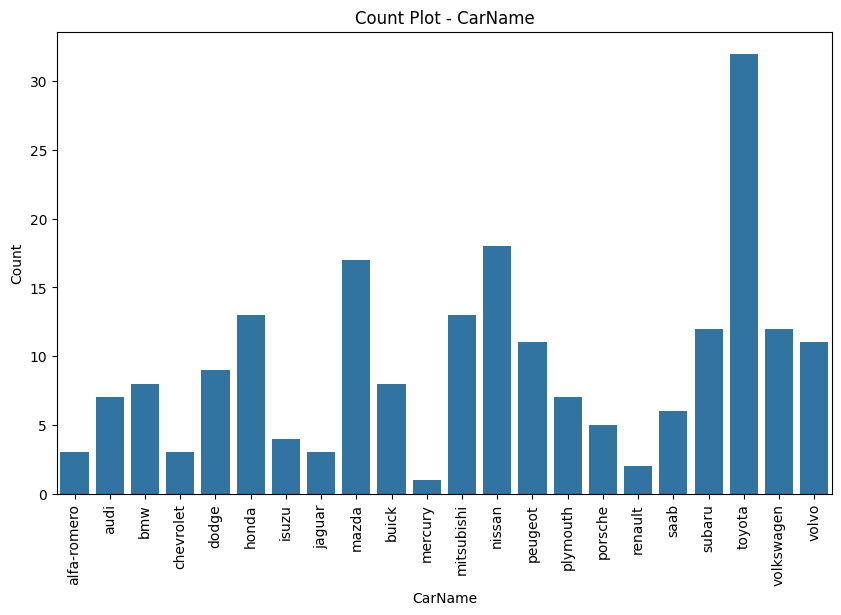

In [17]:
count_plot('CarName')

In [18]:
df['fueltype'].value_counts().reset_index()

,fueltype,count
0,gas,185
1,diesel,20


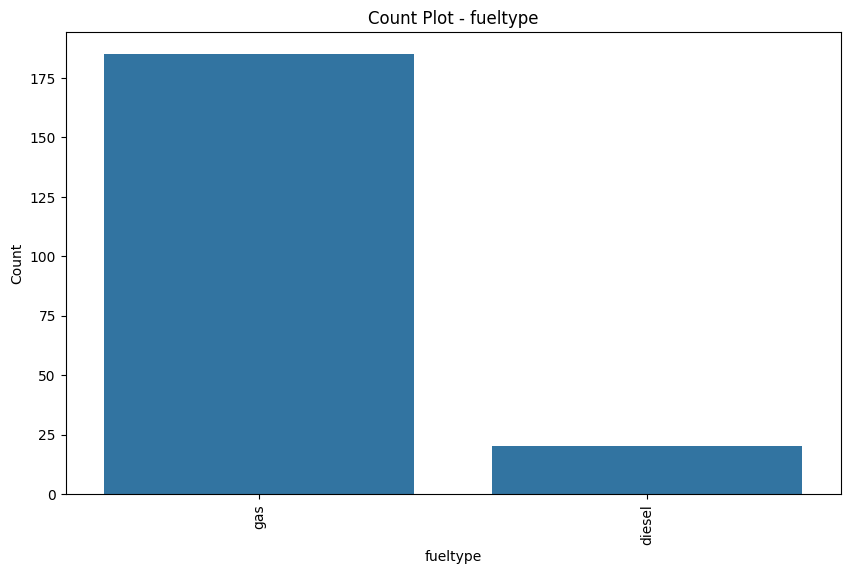

In [19]:
count_plot('fueltype')

In [20]:
df['aspiration'].value_counts().reset_index()

,aspiration,count
0,std,168
1,turbo,37


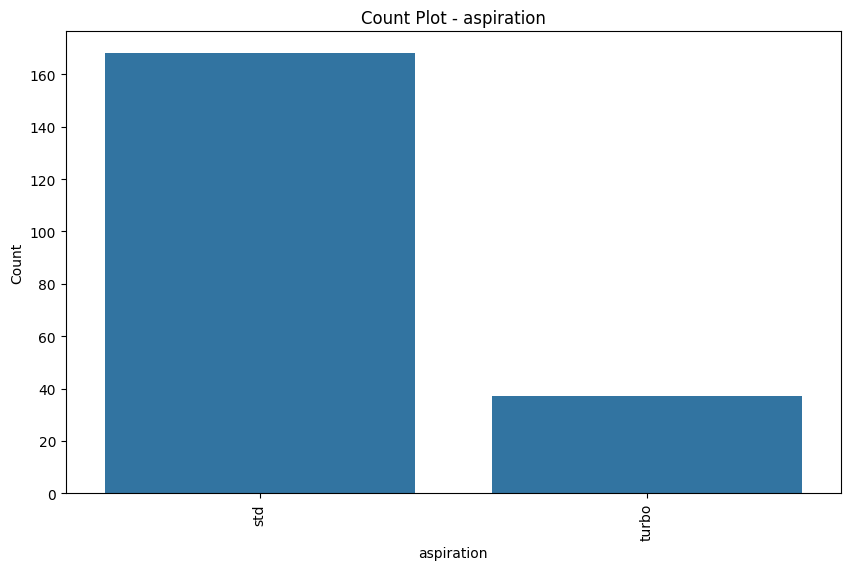

In [21]:
count_plot('aspiration')

In [22]:
df['doornumber'].value_counts().reset_index()

,doornumber,count
0,four,115
1,two,90


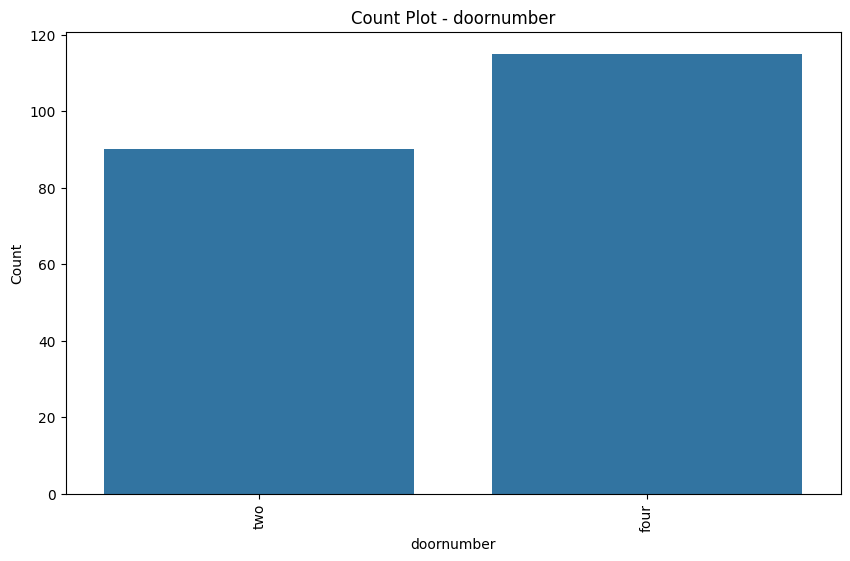

In [23]:
count_plot('doornumber')

In [24]:
df['carbody'].value_counts().reset_index()

,carbody,count
0,sedan,96
1,hatchback,70
2,wagon,25
3,hardtop,8
4,convertible,6


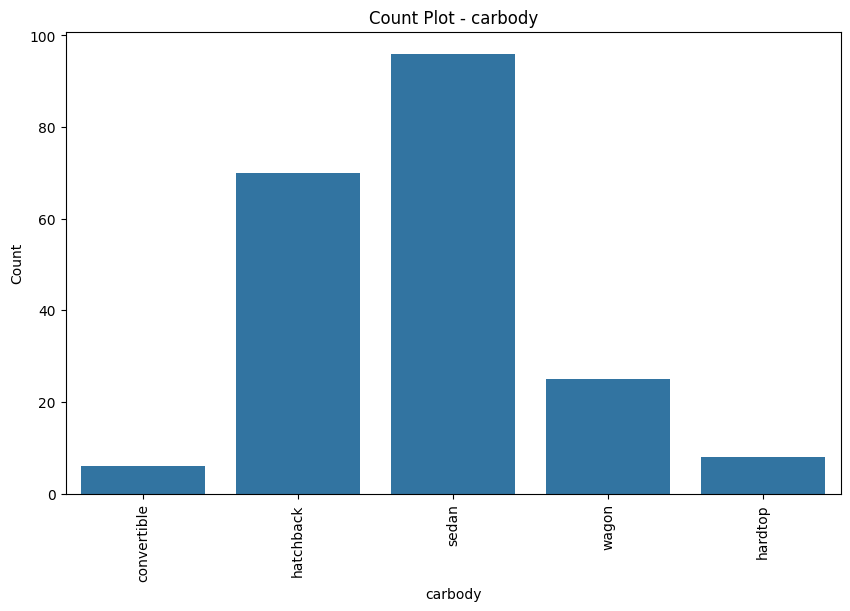

In [25]:
count_plot('carbody')

In [26]:
df['drivewheel'].value_counts().reset_index()

,drivewheel,count
0,fwd,120
1,rwd,76
2,4wd,9


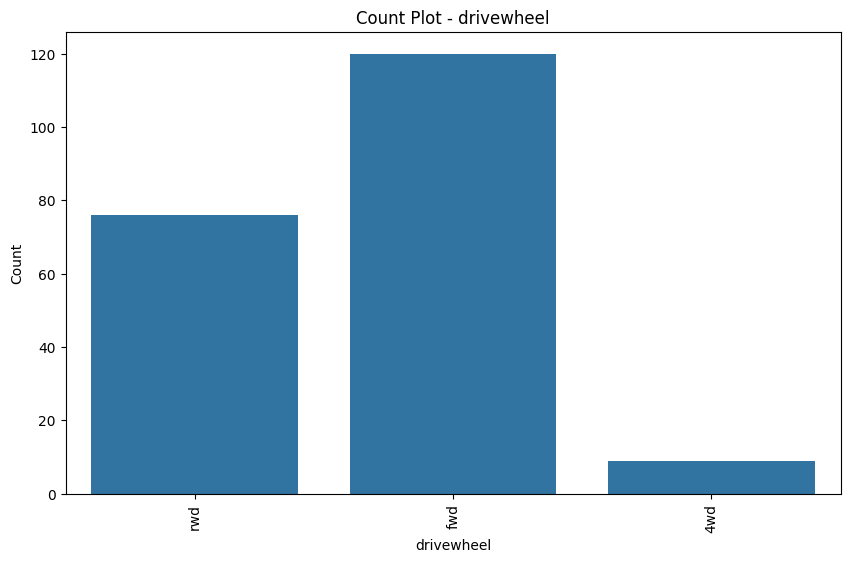

In [27]:
count_plot('drivewheel')

In [28]:
df['enginelocation'].value_counts().reset_index()

,enginelocation,count
0,front,202
1,rear,3


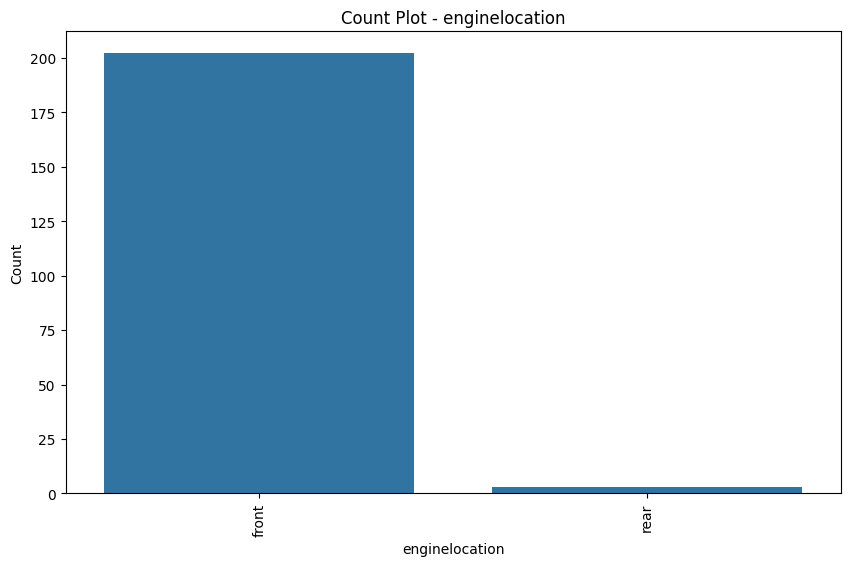

In [29]:
count_plot('enginelocation')

In [30]:
df['enginetype'].value_counts().reset_index()

,enginetype,count
0,ohc,148
1,ohcf,15
2,ohcv,13
3,dohc,12
4,l,12
5,rotor,4
6,dohcv,1


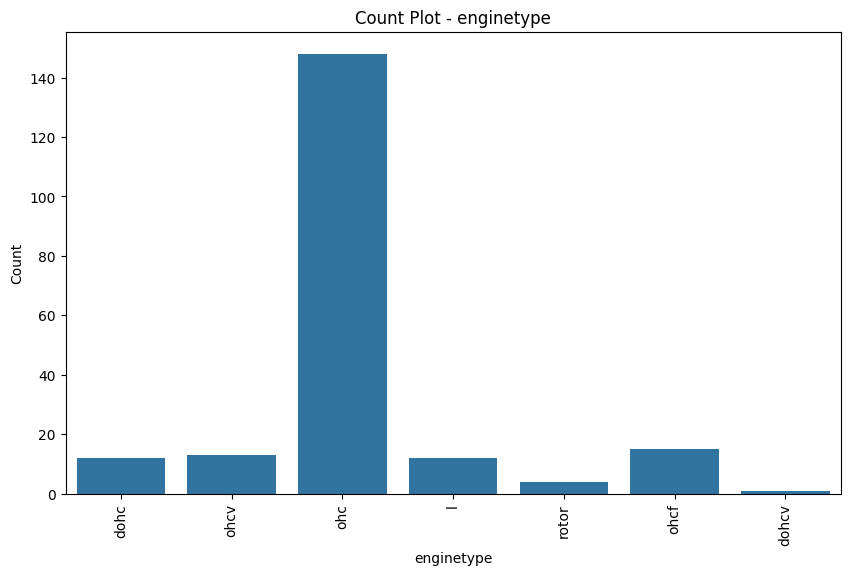

In [31]:
count_plot('enginetype')

In [32]:
df['cylindernumber'].value_counts().reset_index()

,cylindernumber,count
0,four,159
1,six,24
2,five,11
3,eight,5
4,two,4
5,three,1
6,twelve,1


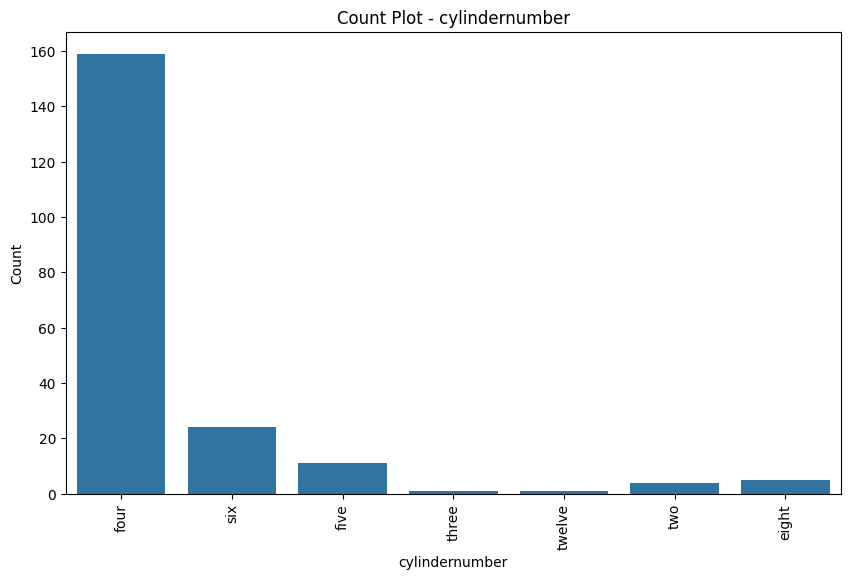

In [33]:
count_plot('cylindernumber')

In [34]:
df['fuelsystem'].value_counts().reset_index()

,fuelsystem,count
0,mpfi,94
1,2bbl,66
2,idi,20
3,1bbl,11
4,spdi,9
5,4bbl,3
6,mfi,1
7,spfi,1


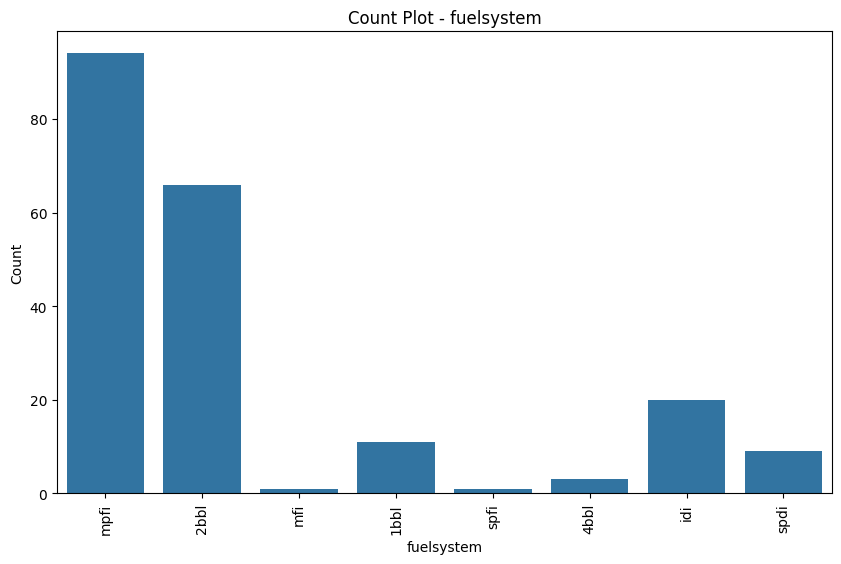

In [35]:
count_plot('fuelsystem')

## Histogram

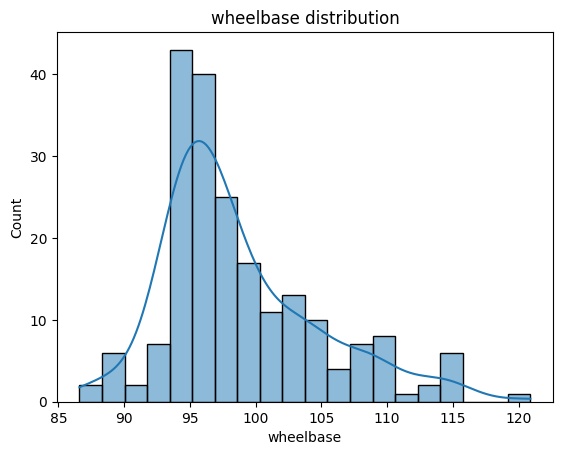

In [36]:
histogram('wheelbase')

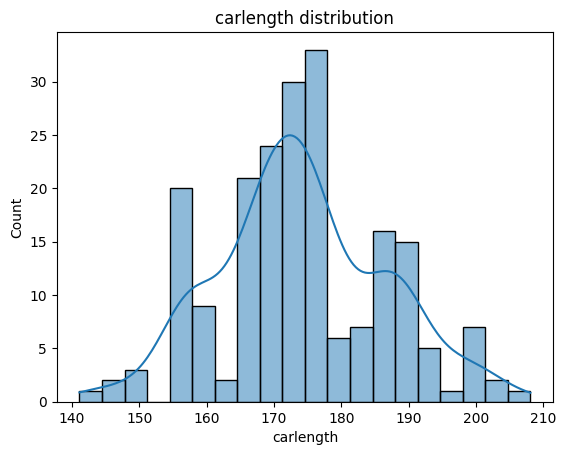

In [37]:
histogram('carlength')

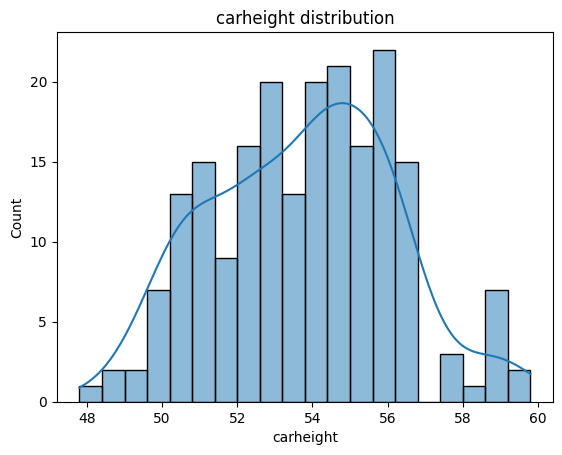

In [38]:
histogram('carheight')

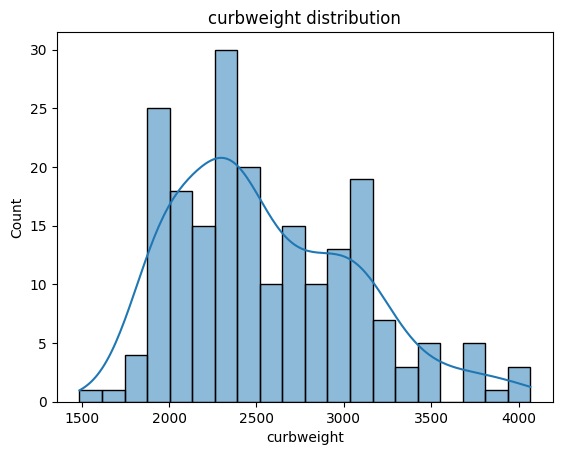

In [39]:
histogram('curbweight')

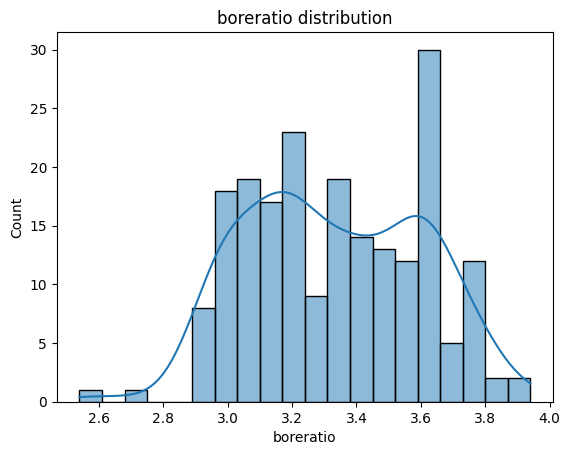

In [40]:
histogram('boreratio')

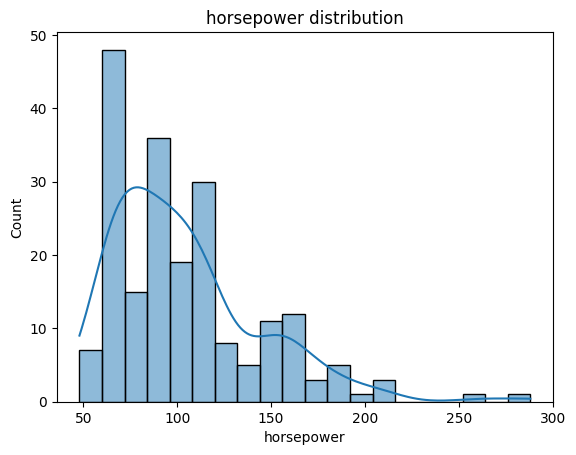

In [41]:
histogram('horsepower')

In [42]:
categorical_columns = df.select_dtypes(include=object).columns.tolist()
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

## Categorical columns relationship with the price

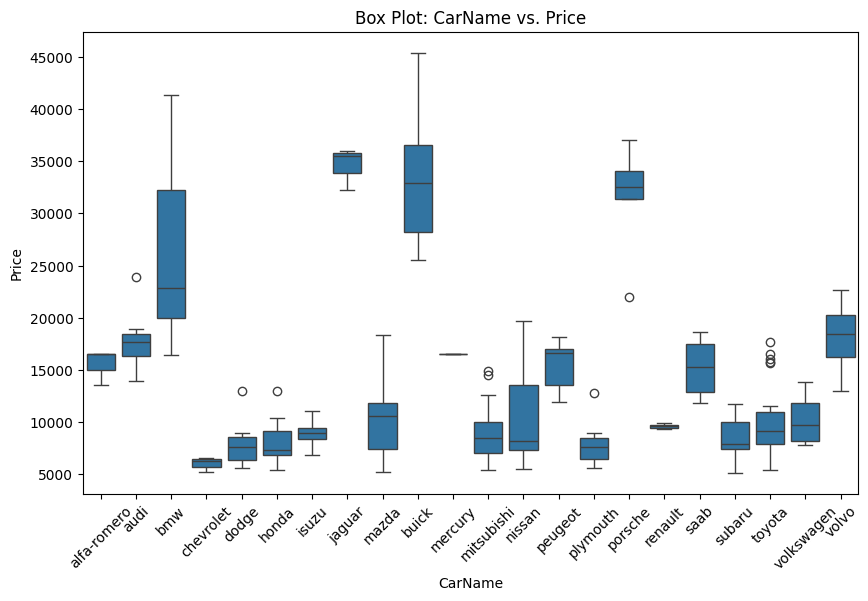

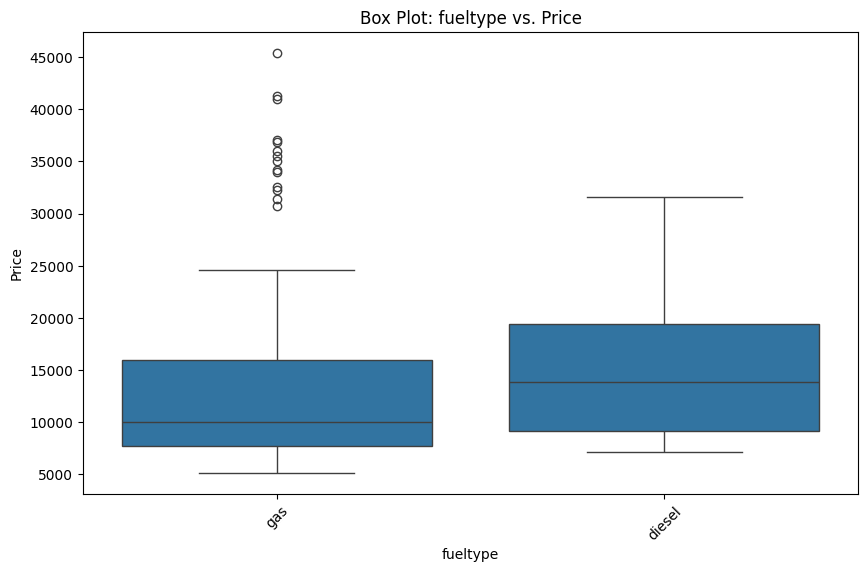

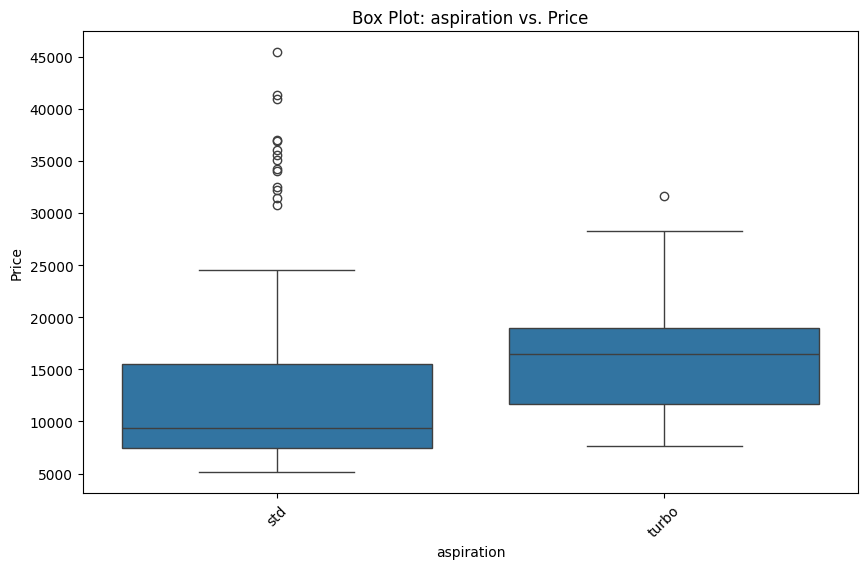

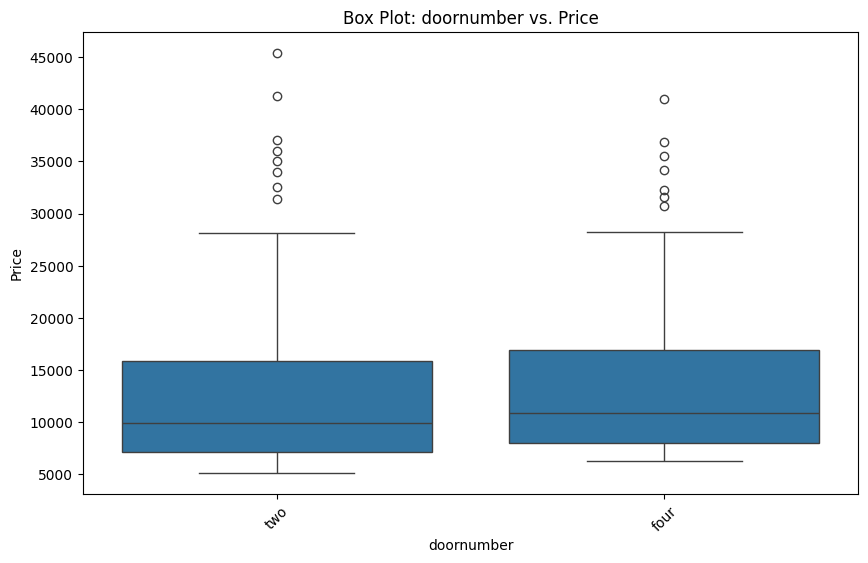

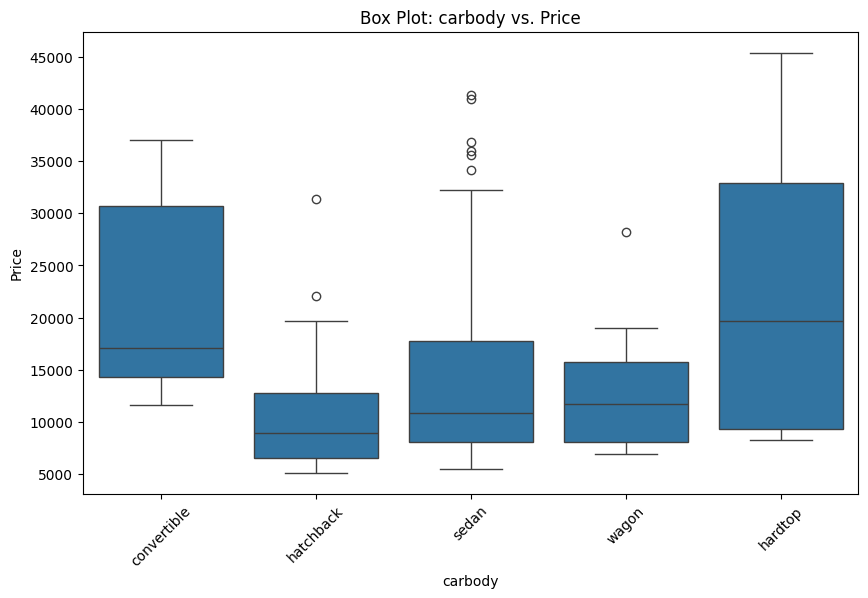

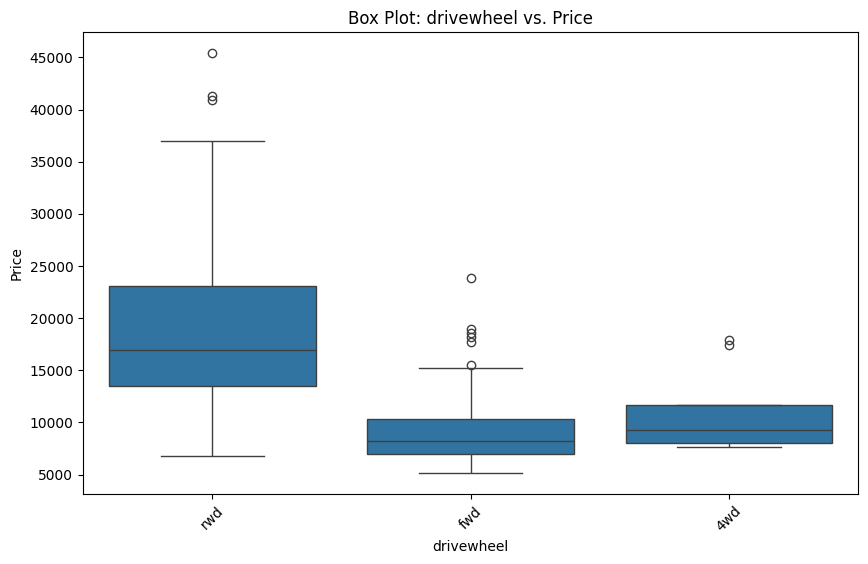

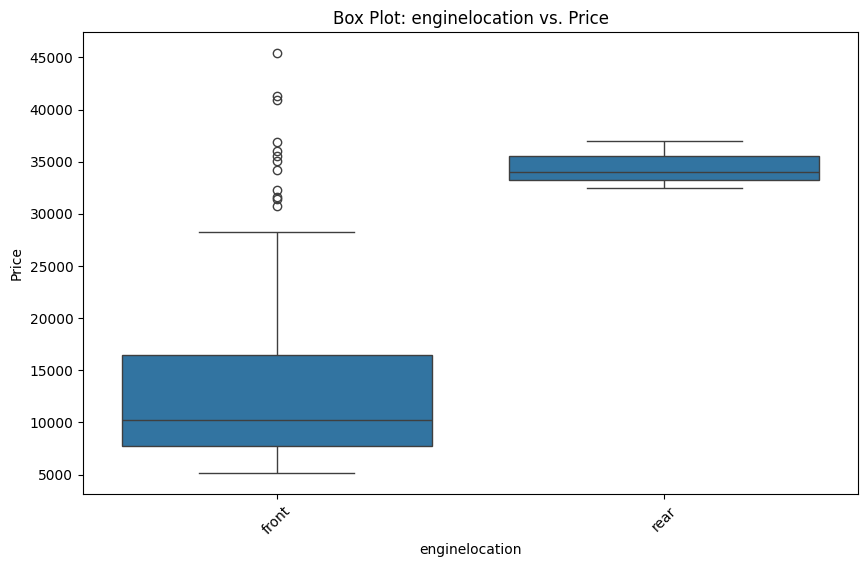

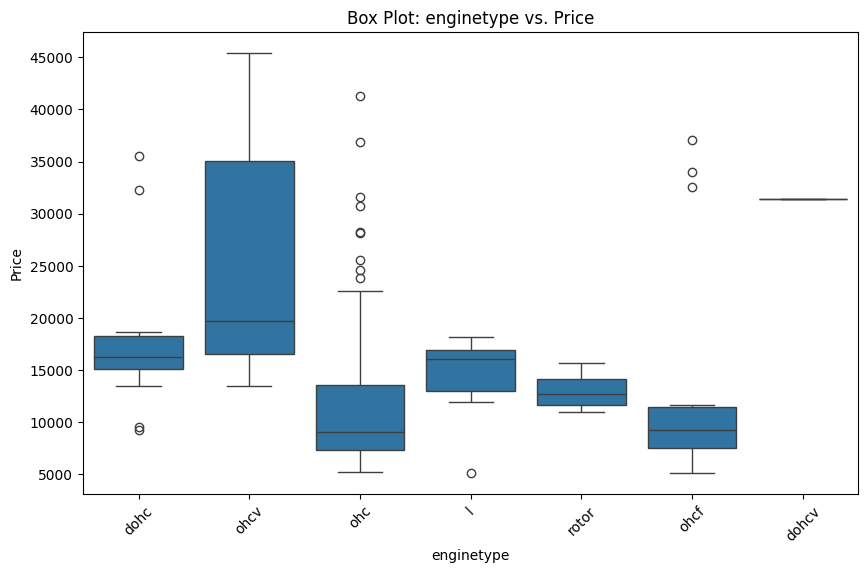

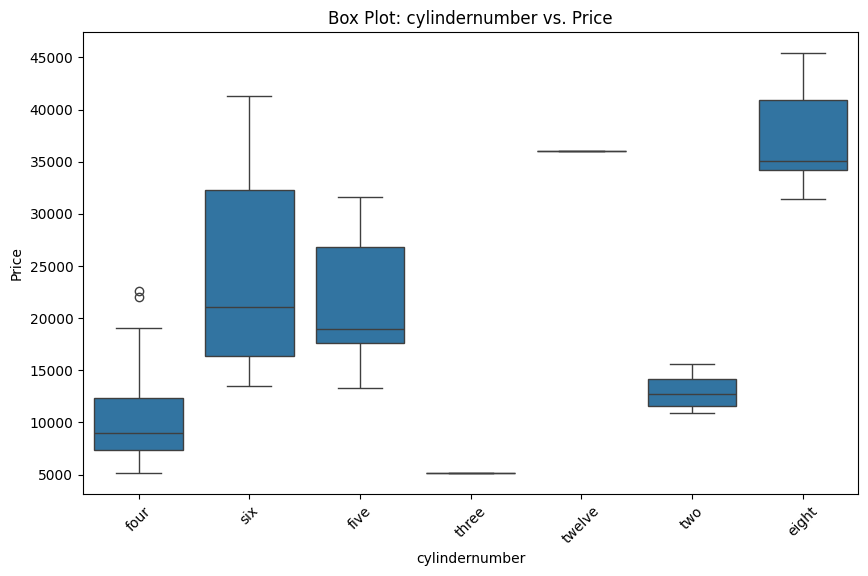

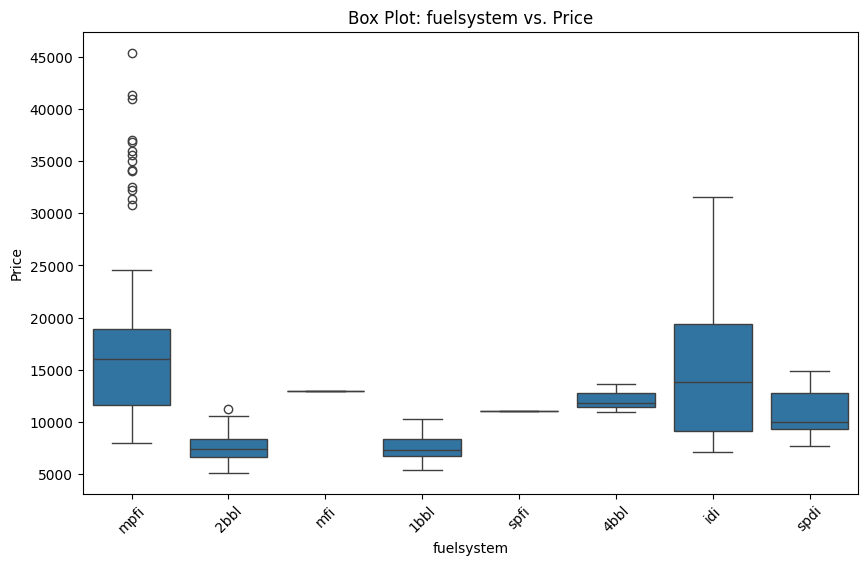

In [43]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='price', data=df)
    plt.title(f'Box Plot: {column} vs. Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

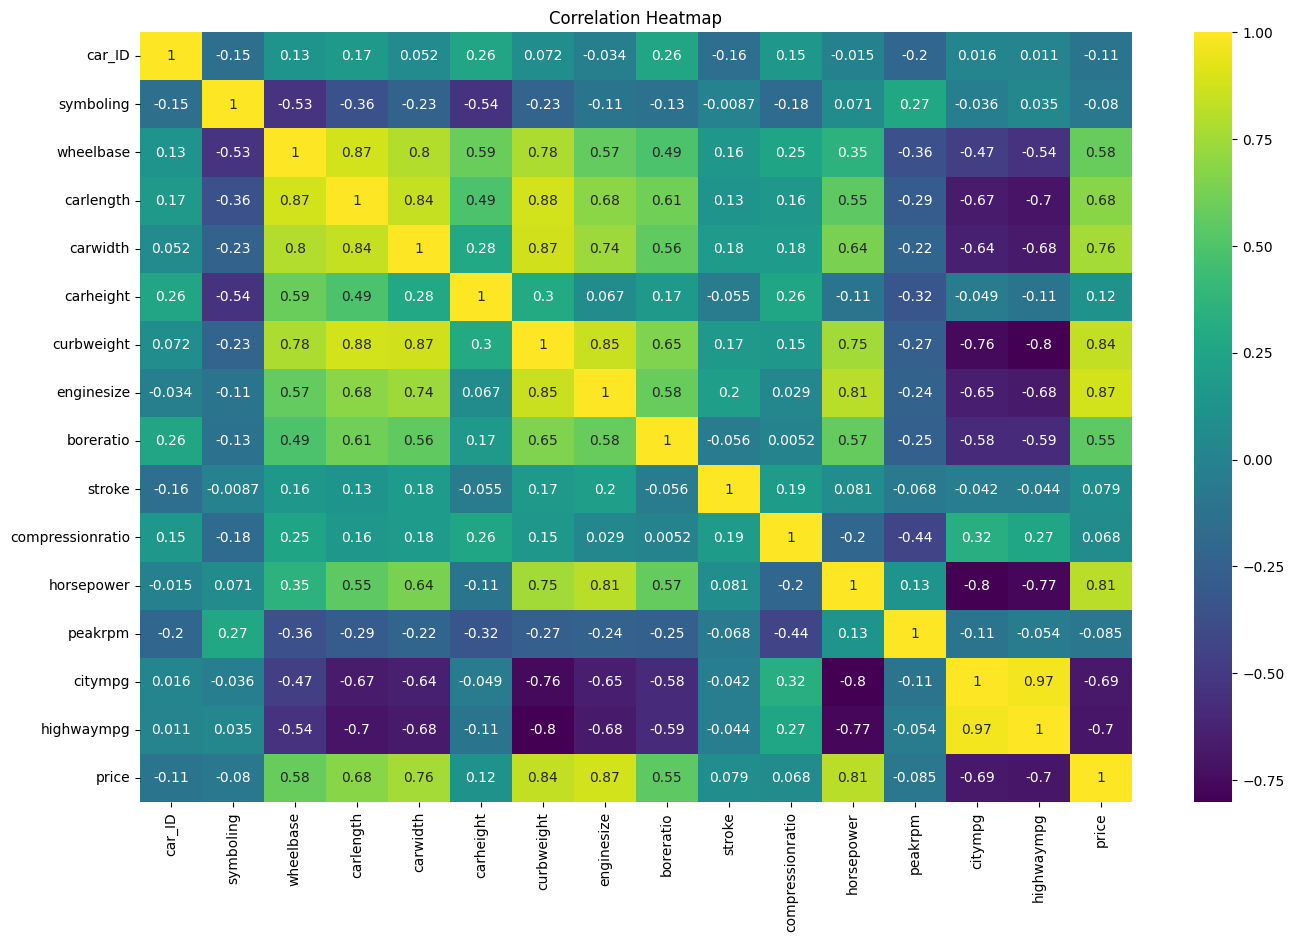

In [44]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing

In [45]:
dropped_columns = ['car_ID', 'symboling']
df.drop(columns=dropped_columns, inplace=True)

In [46]:
numerical_columns.remove('car_ID')
numerical_columns.remove('symboling')

In [47]:
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [48]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [49]:
df.head(5)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,...,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,0,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,...,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,0,1,0,1,2,2,0,-0.708596,-0.231513,-0.190566,...,0.604046,5,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,1,1,0,0,3,1,0,0.173698,0.207256,0.136542,...,-0.431076,5,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,1,1,0,0,3,0,0,0.107110,0.207256,0.230001,...,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668


In [50]:
class LinearRegression:
    def __init__(self, X, Y, lr=0.0001, max_iter=10000):
        self.x = X
        self.y = Y.reshape(-1, 1)
        self.max_iter = max_iter
        self.lr = lr
    

    def fit(self):
        w = np.zeros((1, self.x.shape[1]))
        b = 0        

        for _ in range(self.max_iter):            
            pred = np.dot(self.x, w.T) + b        

            error = np.mean((pred - self.y))            

            dJ_dw = np.mean(self.x * (pred - self.y), axis=0)
            dJ_db = error    
            
            w = w - self.lr * dJ_dw
            b = b - self.lr * dJ_db 
        
        self.w = w
        self.b = b

    def predict(self, x):        
        return (np.dot(x, self.w.T) + self.b).flatten()
    


## Building The Model

In [51]:
X = df.drop(['price', 'CarName'], axis=1) 
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model = LinearRegression(X_train.values, y_train.values)
model.fit()

In [53]:
model.w

array([[-1.73576235e-02, -1.33646121e-02, -6.26474986e-05,
        -8.83710824e-02,  5.42280414e-02,  3.12999409e-02,
         5.00012283e-02,  6.63305399e-02,  1.21854067e-01,
        -8.97187743e-03,  1.32830674e-01,  4.51660507e-02,
        -1.40955229e-02,  2.07973962e-01,  1.78294924e-02,
         4.35362788e-02, -3.30012872e-02,  5.13199852e-02,
         1.73751520e-01,  3.26478208e-02, -7.97056067e-02,
        -7.52256922e-02]])

In [54]:
y_pred = model.predict(X_test)

In [55]:
def calculate_accuracy(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
        
    return mse, rmse, r2

In [56]:
mse, rmse, r2 = calculate_accuracy(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f"R-squared: {r2}")


Mean Squared Error: 0.30629421178364186
Root Mean Squared Error: 0.5534385347838022
R-squared: 0.7535864186927456


In [68]:
scaler.inverse_transform(np.concatenate((np.zeros((41, 13)), y_pred.reshape(-1, 1)), axis=1))[:, -1]

array([23874.84242647, 18734.32038604, 10115.40718753, 15675.6452447 ,
       22773.94182891,  6613.81011727,  7518.22552737,  7173.65689521,
       11777.10049438,  6902.36290494, 15580.94426471,  8190.51393961,
       16509.30693991, 12137.24061688, 34931.72926916,  5542.77892029,
       -3374.66999955, 17543.18359366, 10462.16926644, 12025.89237873,
       11028.34383942, 20787.54466321,  7179.66495872,    94.12818011,
        5081.87782633, 24898.67189929, 16017.82167785, 17268.39390222,
        5415.84297959, 17762.14556703, 23063.79490002,  5741.3005611 ,
        5513.0284655 , 22546.66467043,  9304.06996536, 24113.04678989,
       12467.91676303, 13034.2070097 ,  3876.3863974 , 17745.56241241,
        9853.25955496])

In [71]:
scaler.inverse_transform(np.concatenate((np.zeros((41, 13)), y_test.to_numpy().reshape(-1, 1)), axis=1))[:, -1]

array([30760.   , 17859.167,  9549.   , 11850.   , 28248.   ,  7799.   ,
        7788.   ,  9258.   , 10198.   ,  7775.   , 13295.   ,  8238.   ,
       18280.   ,  9988.   , 40960.   ,  6488.   ,  5151.   , 12629.   ,
        8189.   ,  9960.   ,  8495.   , 13499.   ,  8249.   ,  6479.   ,
        6692.   , 41315.   ,  9639.   , 13415.   ,  7999.   , 12940.   ,
       25552.   ,  6229.   ,  7898.   , 21485.   ,  7689.   , 28176.   ,
       11259.   , 10945.   ,  8916.5  , 14489.   ,  7463.   ])